In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [2]:
with open("binarymatrix.npy", "br") as file:
    high_SNR = np.load(file)

In [10]:
fft_number = 1024
overlab = 0.5
fs = 96000

time_duration = 0.02
frequency_width = 50
hop_size = math.ceil(fft_number*(1-overlab))
dt = hop_size/fs
df = fs/fft_number

def whistleFeatureFilter(high_SNR):
        hop_size = math.ceil(fft_number*(1-overlab))
        dt = hop_size/fs
        df = fs/fft_number

        col_size = math.ceil(time_duration/dt)
        row_size = math.ceil(frequency_width/df)

        image_row = high_SNR.T.shape[0]
        image_col = high_SNR.T.shape[1]

        padding = np.zeros((image_row+row_size-1, image_col+col_size-1))
        padding[row_size//2:row_size//2+image_row,col_size//2:col_size//2+image_col] = high_SNR.T

        detection = np.zeros((image_row, image_col))
        for i in range(image_row):
            for j in range(image_col):
                segment = padding[i:i+row_size,j:j+col_size]
                detection[i,j] = np.sum(np.sum(segment, axis=0)>0)
        return detection==col_size

In [19]:
high_SNR.astype(np.int8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [34]:
start = time.time()
d = whistleFeatureFilter(high_SNR)
print("elapsed time: {}".format(time.time()-start))

elapsed time: 0.7051496505737305


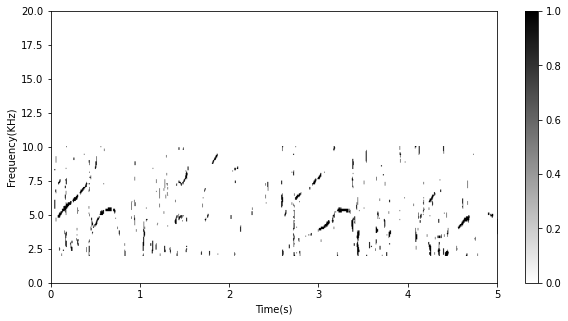

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
f = np.arange(1024/2+1)*fs/1024
start_fre = 2000
end_fre = 10000
start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
im = ax.imshow(high_SNR.T, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

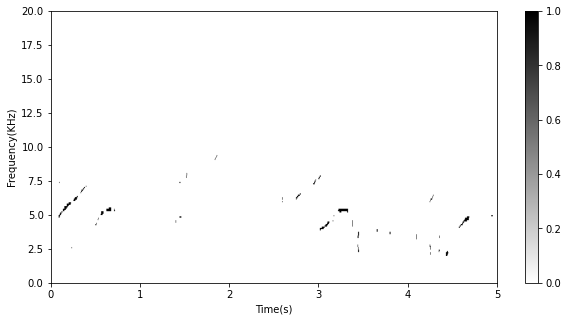

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(d, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [49]:
def whistleFeatureFilter_v2(high_SNR):
    hop_size = math.ceil(fft_number*(1-overlab))
    dt = hop_size/fs

    col_size = math.ceil(time_duration/dt)

    image_row = high_SNR.T.shape[0]
    image_col = high_SNR.T.shape[1]

    padding = np.zeros((image_row, image_col+col_size-1))
    padding[:,col_size//2:col_size//2+image_col] = high_SNR.T.astype(np.int8)
    detection = np.zeros((image_row, image_col))
    for i in range(col_size):
        print(i)
        detection += padding[:,i:i+image_col]
    return detection==col_size

In [28]:
detection.shape

(86, 936)

In [30]:
padding.shape

(86, 939)

In [29]:
high_SNR.shape

(936, 86)

In [44]:
a = np.array([1,21,2,1])
a[0:-1]

array([ 1, 21,  2])

In [50]:
start = time.time()
k = whistleFeatureFilter_v2(high_SNR)
print("elapsed time: {}".format(time.time()-start))

0
1
2
3
elapsed time: 0.0019965171813964844


In [51]:
np.sum((k.astype(np.int8)-d.astype(np.int8)))

0

In [37]:
k

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

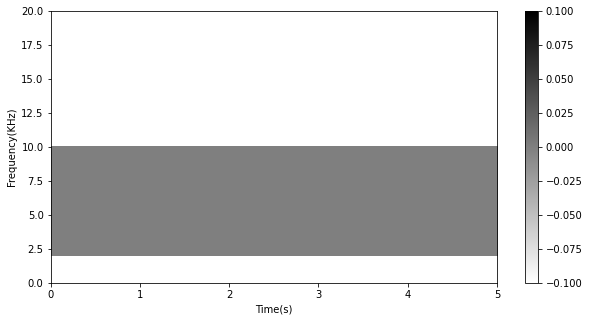

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(k, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [40]:
k

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])